# Thông tin sinh viên

- Họ tên: 
- MSV:  
- STT:

**Bài toán:**
* Tập dữ liệu `movies_metadata.csv` chứa thông tin của các bộ phim.
* Thực hiện quá trình thống kê mô tả sử dụng Python để tìm hiểu về dữ liệu
----------------------

### 1, (1 điểm) Đọc dữ liệu

Đọc file dữ liệu  và thực hiện các yêu cầu sau:

a. Hiển thị 4 dòng đầu tiên

b. Cho biết dữ liệu có kích thước bao nhiêu (bao nhiêu dòng, bao nhiêu cột)



In [11]:
import pandas as pd
df = pd.read_csv('movies_metadata.csv', encoding='latin-1')
df.head(4)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,12/15/1995,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,12/22/1995,0,101,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,12/22/1995,81452156,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34


### 2, (1 điểm) Kiểm tra dữ liệu: đếm số lượng dữ liệu bị thiếu mỗi cột


In [13]:
df.isnull().sum()

adult                     0
belongs_to_collection    39
budget                    0
genres                    0
homepage                 44
id                        0
imdb_id                   0
original_language         0
original_title            0
overview                  1
popularity                0
poster_path               0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   0
spoken_languages          0
status                    0
tagline                   9
title                     0
video                     0
vote_average              0
vote_count                0
dtype: int64

### 3, (1 điểm) Cho biết có bao nhiêu phim sản xuất bằng tiếng Anh. Chiếm tỷ lệ bao nhiêu phần trăm


In [17]:
print("Tỉ lệ phim sản xuất bằng tiếng Anh:", df.original_language.value_counts(normalize=True)['en']*100, "%")


Tỉ lệ phim sản xuất bằng tiếng Anh: 95.91836734693877 %


### 4, (2 điểm) Tính giá trị thống kê trung bình, trung vị độ lệch chuẩn hai thuộc tính

* Ngân sách (budget) 

* Doanh thu (revenue)

In [19]:
print("Ngân sách: ")
print("Trung bình: ", df['budget'].mean())
print("Trung vị: ", df['budget'].median())
print("Độ lệch chuẩn: ", df['budget'].std())

print("Doanh thu: ")
print("Trung bình: ", df['revenue'].mean())
print("Trung vị: ", df['revenue'].median())
print("Độ lệch chuẩn: ", df['revenue'].std())

Ngân sách: 
Trung bình:  21547959.18367347
Trung vị:  12000000.0
Độ lệch chuẩn:  24334949.91601514
Doanh thu: 
Trung bình:  77054396.71428572
Trung vị:  23341568.0
Độ lệch chuẩn:  109112022.9750135


### 5, (2 điểm) Liệt kê top 5 tên phim (title)

* 5 phim có ngân sách đầu tư (budget) nhiều nhất

* 5 phim có doanh thu cao nhất


In [24]:
topBudget = df.nlargest(5, 'budget')
print("Top 5 phim có ngân sách cao nhất: ", topBudget['title'].tolist())

topRevenue = df.nlargest(5, 'revenue')
print("Top 5 phim có doanh thu cao nhất: ", topRevenue['title'].tolist())



Top 5 phim có ngân sách cao nhất:  ['Cutthroat Island', 'Jumanji', 'The American President', 'Heat', 'Money Train']
Top 5 phim có doanh thu cao nhất:  ['Toy Story', 'GoldenEye', 'Pocahontas', 'Se7en', 'Jumanji']


### 6, (1 điểm) Liệt kê 5 phim có lợi nhuận cao nhất


In [25]:
df['profit'] = df['revenue'] - df['budget']
topProfit = df.nlargest(5, 'profit')
print("Top 5 phim có lợi nhuận cao nhất: ", topProfit['title'].tolist())


Top 5 phim có lợi nhuận cao nhất:  ['Toy Story', 'Se7en', 'GoldenEye', 'Pocahontas', 'Babe']


### 7, (1 điểm) Vẽ đồ thị phân phối tần số về thời lượng của bộ phim (`runtime`)


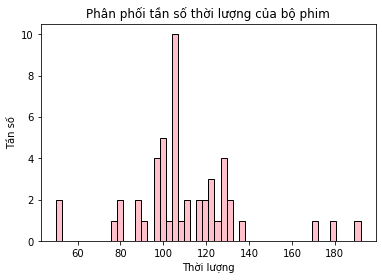

In [29]:
import matplotlib.pyplot as plt

plt.hist(df['runtime'], bins=50, color='pink', edgecolor='black')
plt.title('Phân phối tần số thời lượng của bộ phim')
plt.xlabel('Thời lượng')
plt.ylabel('Tần số')
plt.show()

### 8, (1 điểm) Vẽ đồ thị boxplot về lợi nhuận. Dựa vào đồ thị trên bạn hãy cho nhận xét về lợi nhuận của phim `The American President`


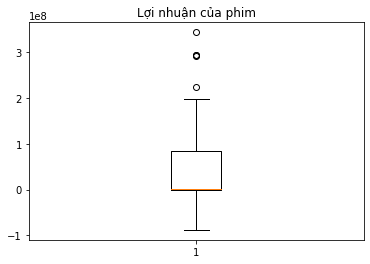

Lợi nhuận của phim The American President:  45879496
Lợi nhuận trung bình của phim:  55506437.530612245


In [39]:
# (1 điểm) Vẽ đồ thị boxplot về lợi nhuận. Dựa vào đồ thị trên bạn hãy cho nhận xét về lợi nhuận của phim `The American President`
plt.boxplot(x=df['profit'])
plt.title('Lợi nhuận của phim')
plt.show()

print("Lợi nhuận của phim The American President: ", df[df['title'] == 'The American President']['profit'].values[0])
print("Lợi nhuận trung bình của phim: ", df['profit'].mean())
# Lợi nhuận của phim The American President:  45879496
# Lợi nhuận trung bình của phim:  55506437.530612245
# Ta thấy lợi nhuận của phim The American President thấp hơn lợi nhuận trung bình 




---